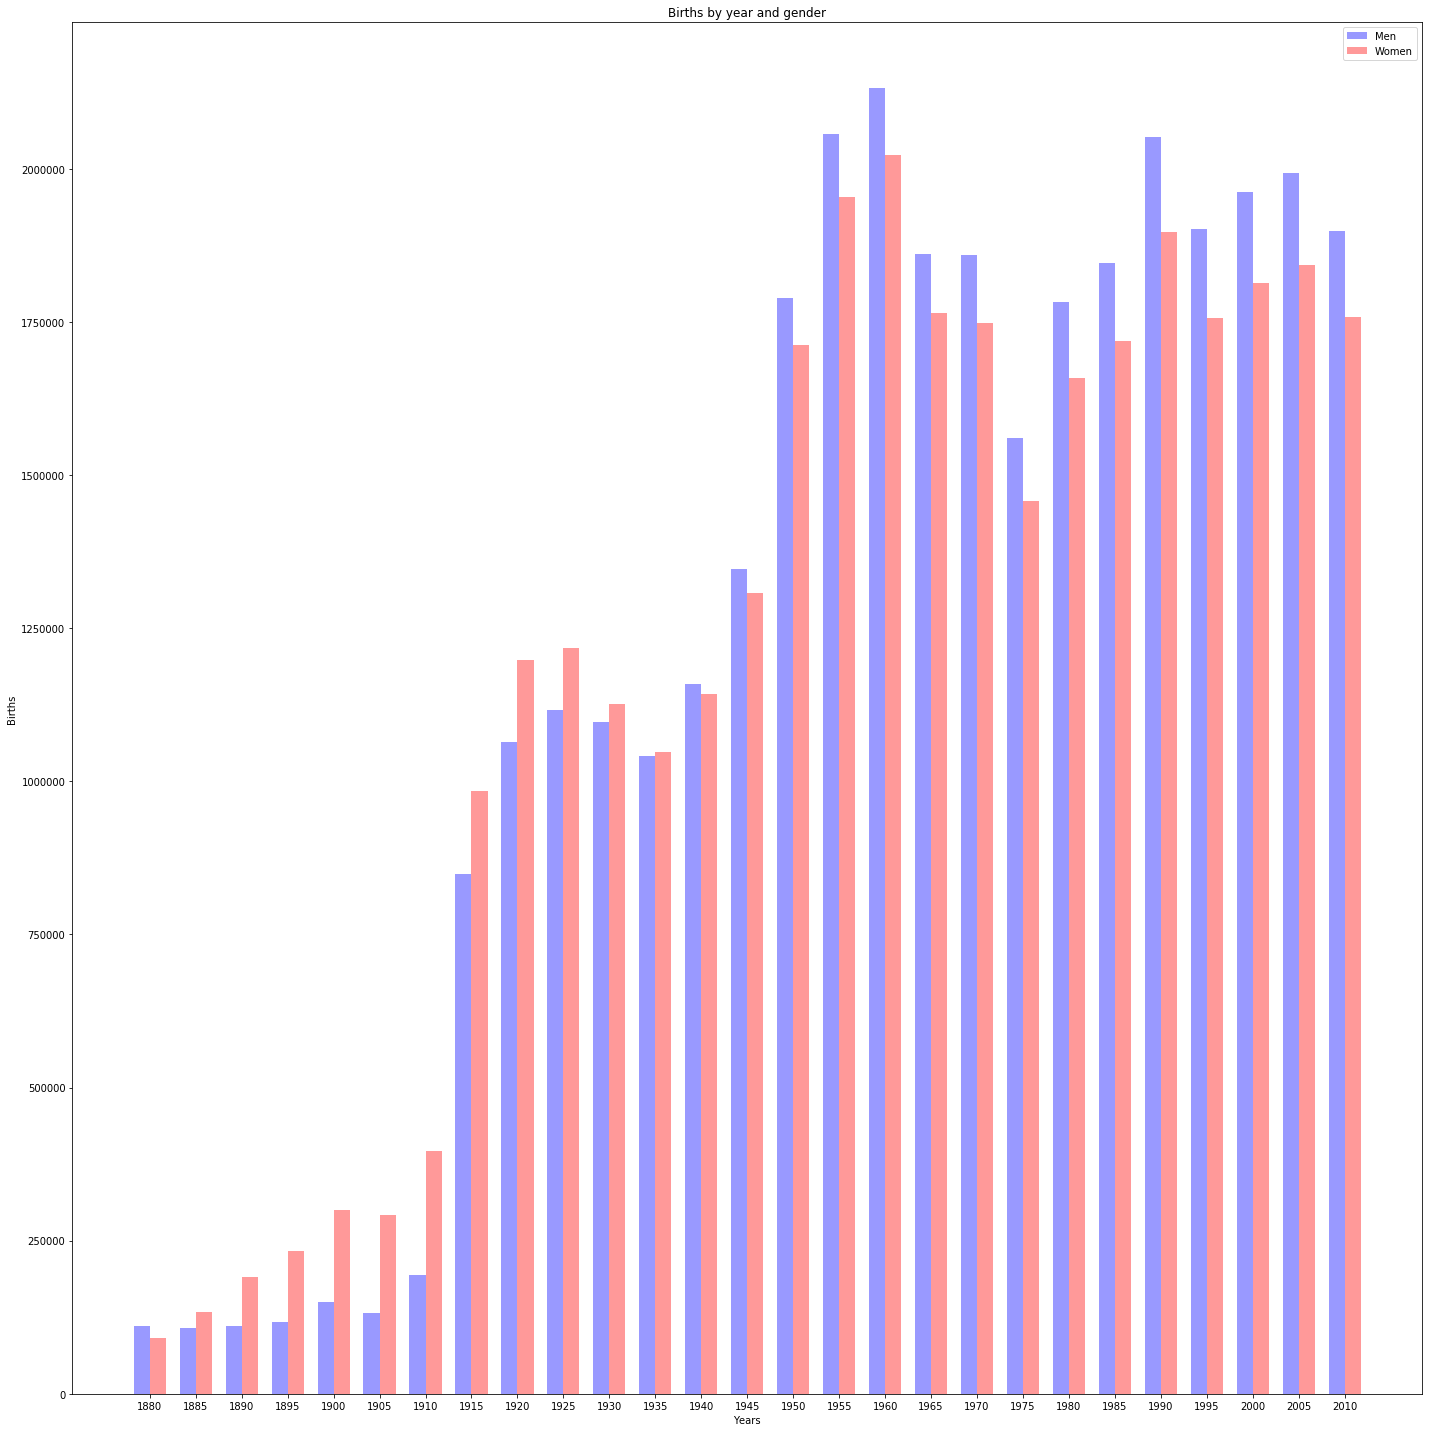

In [169]:
# Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

years = np.arange(1880, 2011, 5)

DataSetTemplate = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob{year}.txt'
dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframes.append(dataframe.assign(year=year))

result = pd.concat(dataframes)
sex = result.groupby('sex')
births_men = sex.get_group('M').groupby('year', as_index=False)
births_women = sex.get_group('F').groupby('year', as_index=False)
births_men_list = births_men.aggregate(np.sum)['count'].tolist()
births_women_list = births_women.aggregate(np.sum)['count'].tolist()

fig, ax = plt.subplots()
fig.set_size_inches(20,20)

index = np.arange(len(years))

bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, births_men_list, bar_width,
                alpha=opacity, color='b',
                label='Men')

rects2 = ax.bar(index + bar_width, births_women_list, bar_width,
                alpha=opacity, color='r',
                label='Women')

ax.set_xlabel('Years')
ax.set_ylabel('Births')
ax.set_title('Births by year and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()
plt.show()

In [170]:
# Найдите самые популярные имена за всю историю
years = np.arange(1880, 2011)

dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframes.append(dataframe)

result = pd.concat(dataframes)
names = result.groupby('name', as_index=False).sum().sort_values('count', ascending=False)
names.head()['name'].tolist()

['James', 'John', 'Robert', 'Michael', 'Mary']

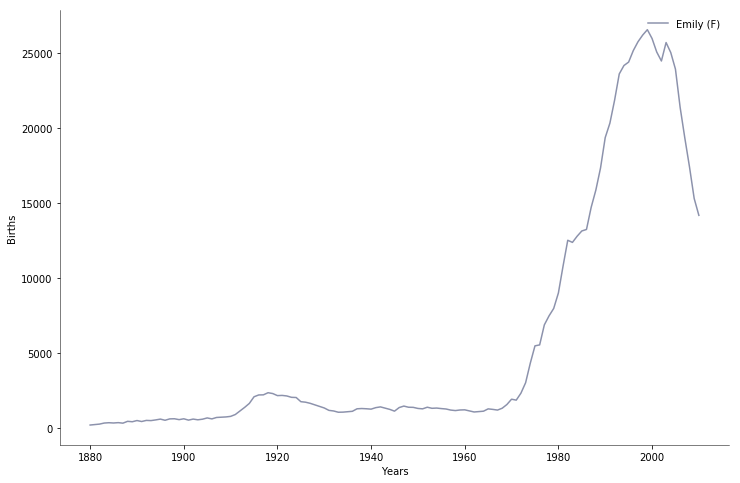

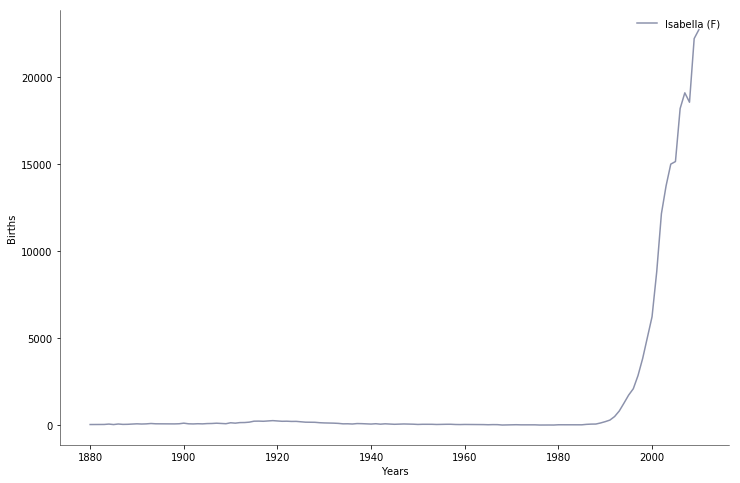

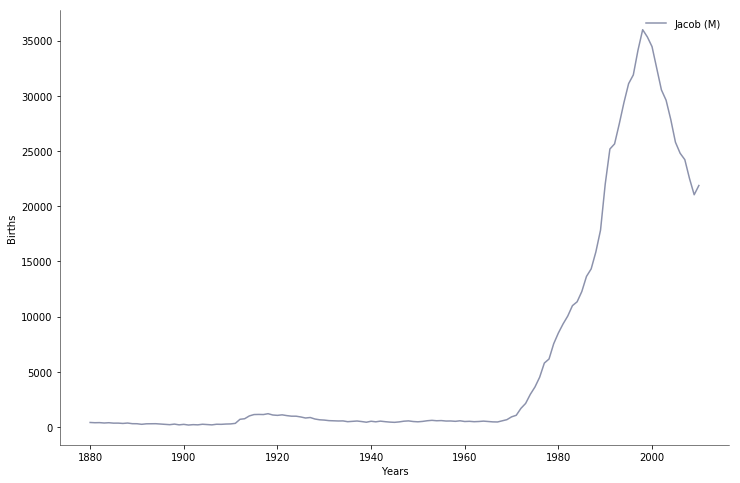

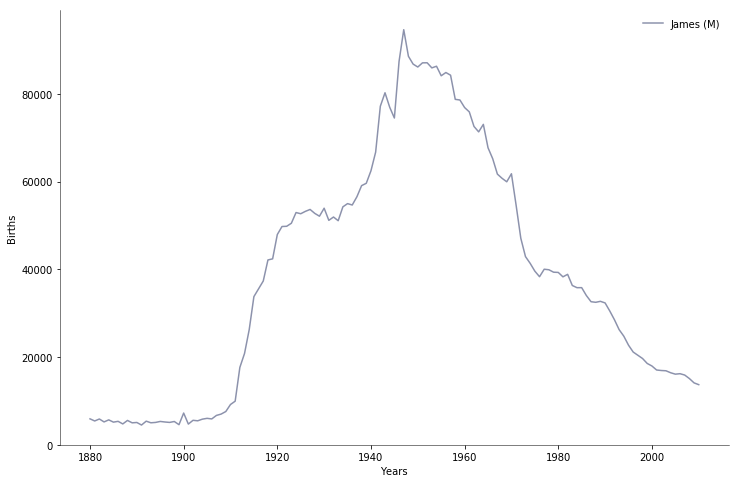

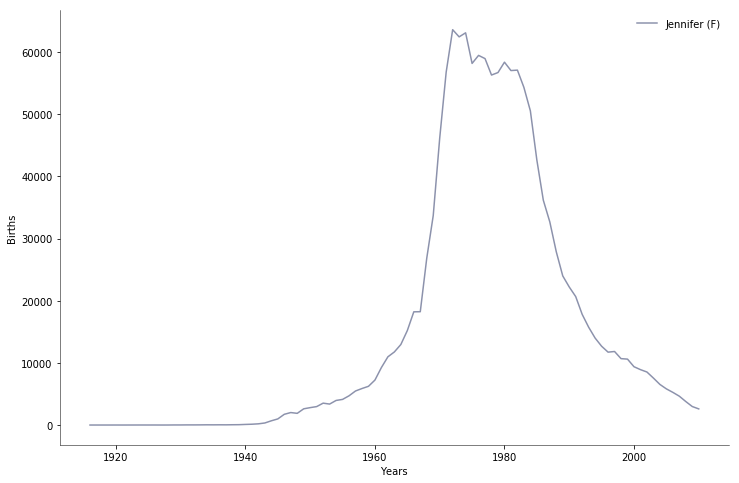

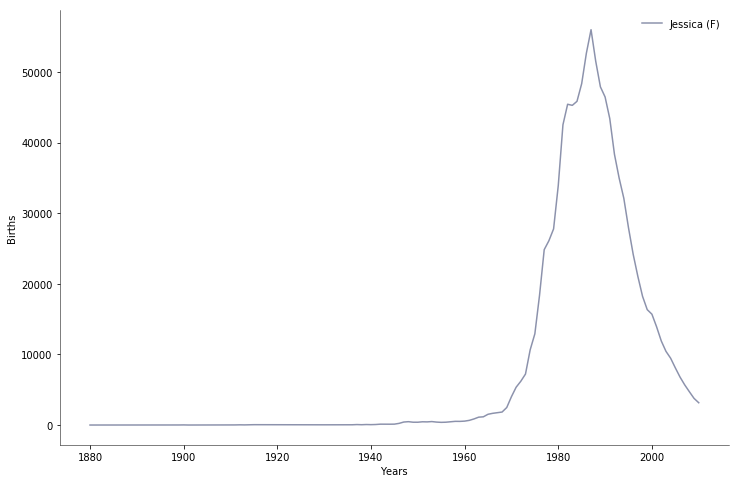

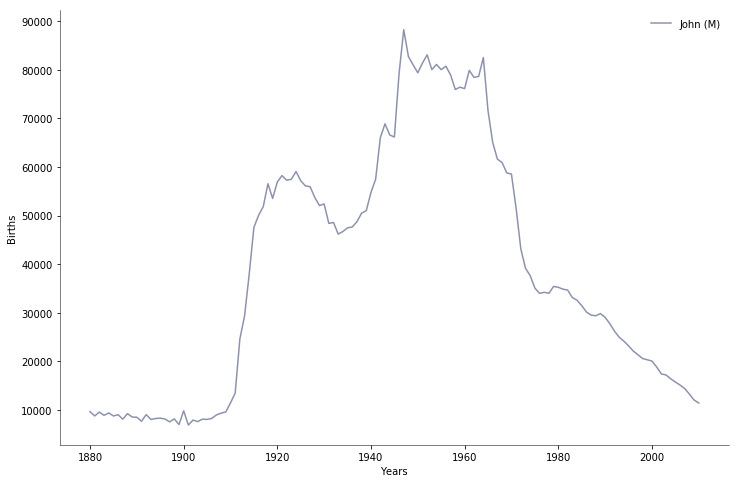

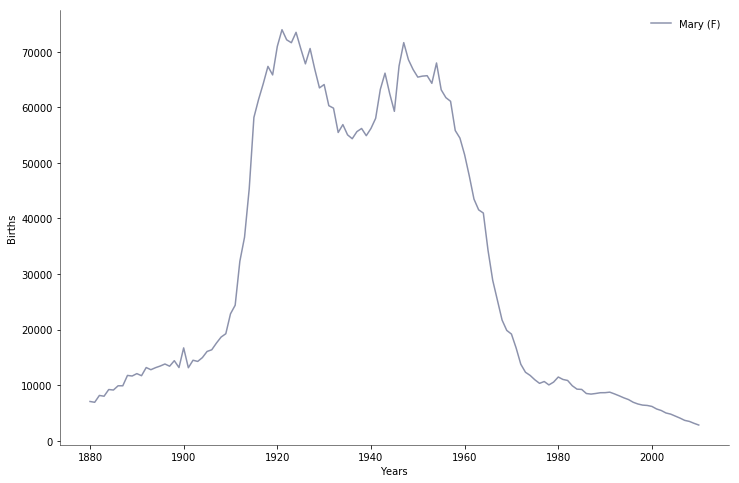

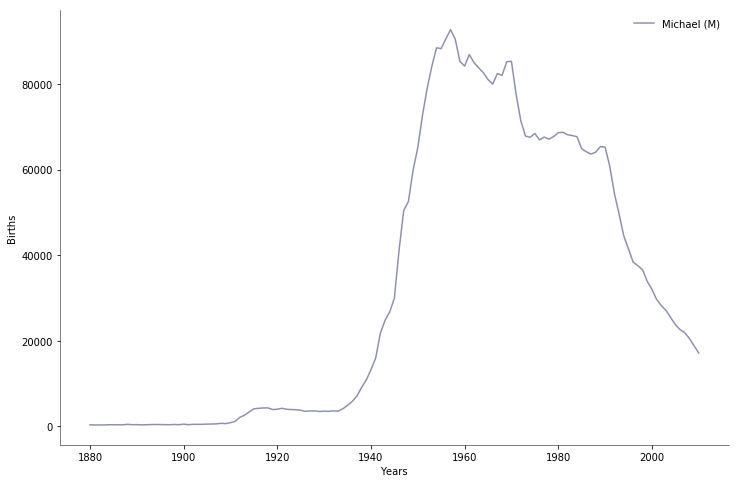

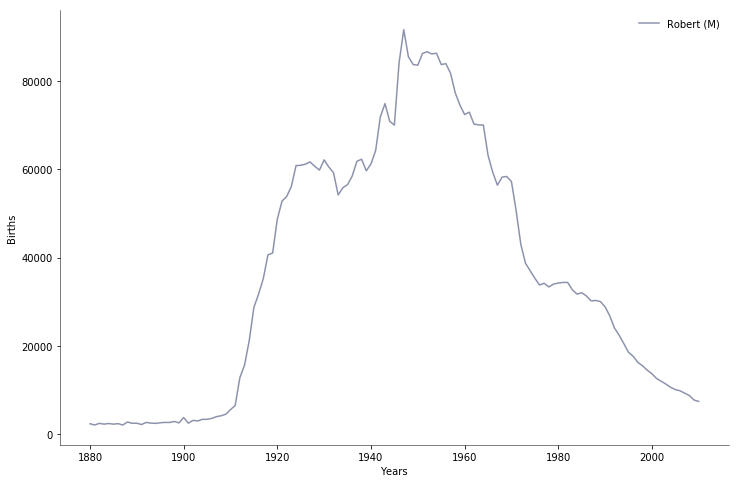

In [171]:
# Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола.
# Для каждого найденного имени визуализируйте его динамику за все время
years = np.arange(1880, 2011)
part_size = int((years[years.size - 1] - years[0]) / 10) + 1
parts = {}
def GetPart(year):
    return int((year - years[0]) / part_size)
for year in years:
    index = GetPart(year)
    r = years[0] + part_size * index, min(years[years.size - 1], years[0] + part_size * (index + 1))
    parts[index] = str(r[0]) + '-' + str(r[1])

dataframe_parts = []
dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframe_parts.append(dataframe.assign(years=parts[GetPart(year)]))
    dataframes.append(dataframe.assign(year=year))

result_parts = pd.concat(dataframe_parts)
result = pd.concat(dataframes)

result_parts_sums = result_parts.groupby(['years', 'sex', 'name'], as_index=False).sum()
result_parts_names = result_parts_sums.iloc[result_parts_sums.groupby(['years', 'sex'], as_index=False).apply(lambda x: x['count'].idxmax())]

result_sums = result.groupby(['year', 'sex', 'name'], as_index=False).sum()

for groupName, groupLabels in result_parts_names.groupby(['name', 'sex']).groups.items():
    group = result_sums.groupby(['name', 'sex']).get_group(groupName)
    fig, ax = plt.subplots(1, 1, figsize=(12,8))

    ax.set_xlabel('Years', fontsize = 10)
    ax.set_ylabel('Births', fontsize = 10)
    label = group['name'] + ' (' + group['sex'] + ')'
    ax.plot(group['year'], group['count'], label=label.aggregate(np.max), color='#8c92ac', ls='-')
    ax.legend(loc=1, fontsize=10, frameon=False) # upper left corner

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)


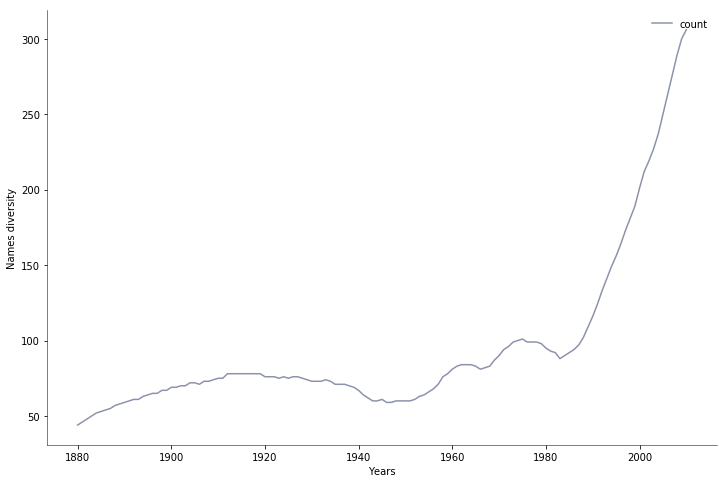

In [172]:
# Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте
# (мы увидим разнообразие имен за каждый год)
dataframe = pd.DataFrame({'year': [], 'count': []})
years = np.arange(1880, 2011)
for year in years:
    dataset = DataSetTemplate.format(year=year)
    csv = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    names = csv.groupby('name', as_index=False).aggregate(np.sum)
    names['sum'] = names.sum()['count']
    names['percent'] = names['count'] / names['sum'] * 100
    names = names.sort_values(['percent'], ascending=False)
    names['cum_perc'] = names['percent'].cumsum()
    names_filtered = names[names['cum_perc'] <= 50]
    dataframe = dataframe.append(pd.DataFrame({'year': [year], 'count': [names_filtered.shape[0]]}))

fig, ax1 = plt.subplots(1, 1, figsize=(12,8))

ax1.set_xlabel('Years', fontsize = 10)
ax1.set_ylabel('Names diversity', fontsize = 10)
ax1.plot(dataframe['year'], dataframe['count'], color='#8c92ac', ls='-')
ax1.legend(loc=1, fontsize=10, frameon=False) # upper left corner

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.5)

    

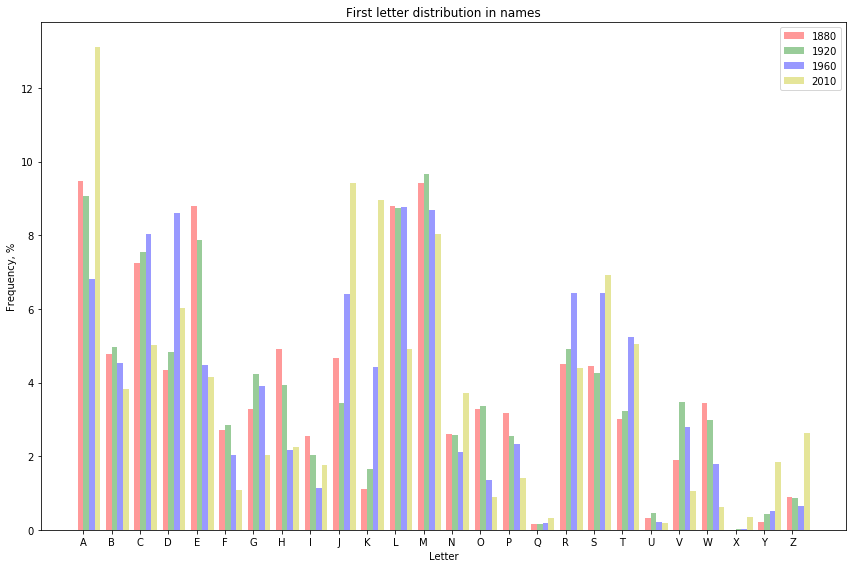

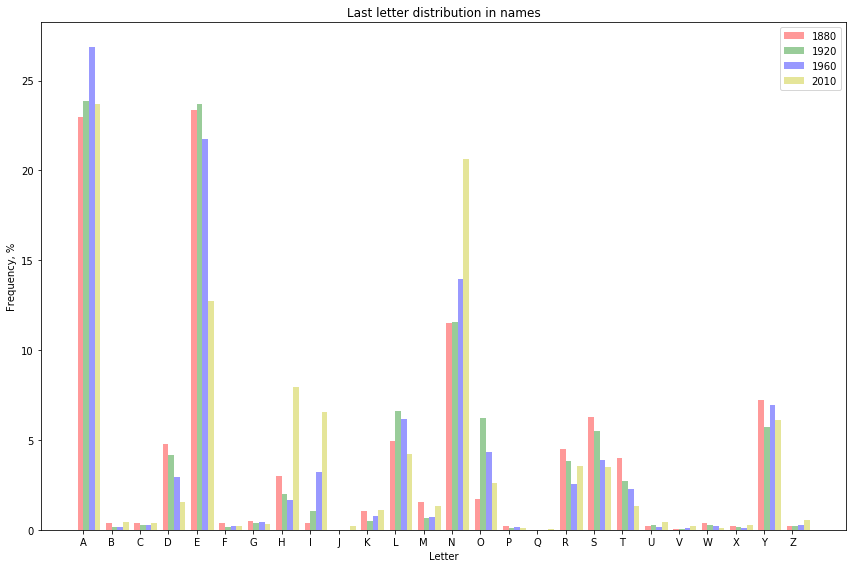

In [173]:
# Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени,
# по последней букве в имени
from string import ascii_lowercase, ascii_uppercase

fig_first, ax_first = plt.subplots(1, 1, figsize=(12,8))
fig_last, ax_last = plt.subplots(1, 1, figsize=(12,8))


index = np.arange(len(ascii_uppercase))
bar_width = 0.2

opacity = 0.4

years = [1880, 1920, 1960, 2010]
colors = ['r', 'g', 'b', 'y']
n = 0
for year in years:
    dataset = DataSetTemplate.format(year=year)
    csv = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    names = csv.groupby('name', as_index=False).aggregate(np.sum)
    count = names.shape[0]

    dataframe = pd.DataFrame({'letter': [], 'frequency_first': [], 'frequency_last': []})
    
    for letter in ascii_uppercase:
        countFirst = (names[names.name.str.startswith(letter)].count()['count'])
        countLast = (names[names.name.str.endswith(letter.lower())].count()['count'])

        dataframe = dataframe.append(pd.DataFrame({
            'letter': [letter],
            'frequency_first': [countFirst / count * 100],
            'frequency_last': [countLast / count * 100]}))

    ax_first.bar(index + bar_width * n, dataframe['frequency_first'], bar_width,
        alpha=opacity, color=colors[n],
        label=year)
    
    ax_last.bar(index + bar_width * n, dataframe['frequency_last'], bar_width,
        alpha=opacity, color=colors[n],
        label=year)

    n += 1

ax_first.set_xlabel('Letter')
ax_first.set_ylabel('Frequency, %')
ax_first.set_title('First letter distribution in names')
ax_first.set_xticks(index + bar_width / 2)
ax_first.set_xticklabels(ascii_uppercase)
ax_first.legend()

ax_last.set_xlabel('Letter')
ax_last.set_ylabel('Frequency, %')
ax_last.set_title('Last letter distribution in names')
ax_last.set_xticks(index + bar_width / 2)
ax_last.set_xticklabels(ascii_uppercase)
ax_last.legend()

fig_first.tight_layout()
fig_last.tight_layout()

plt.show()

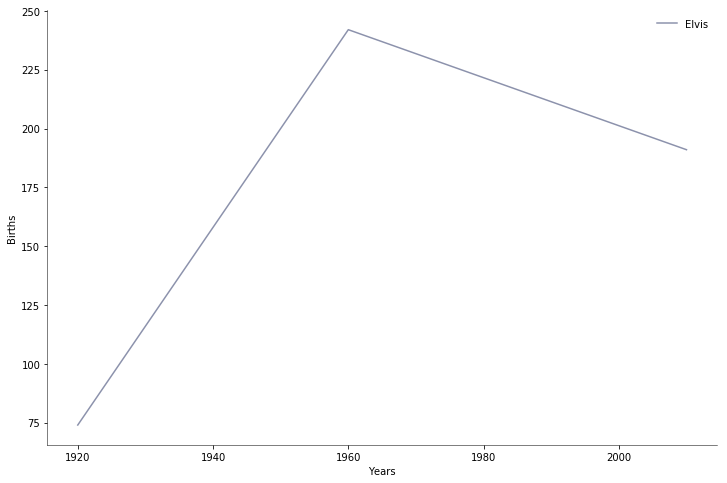

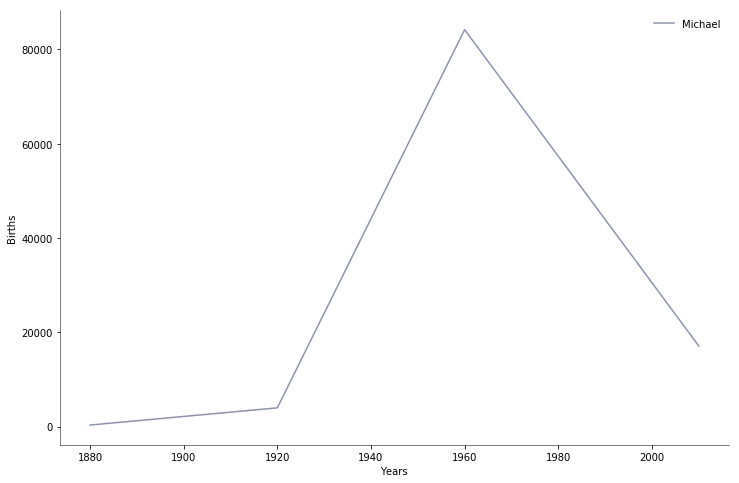

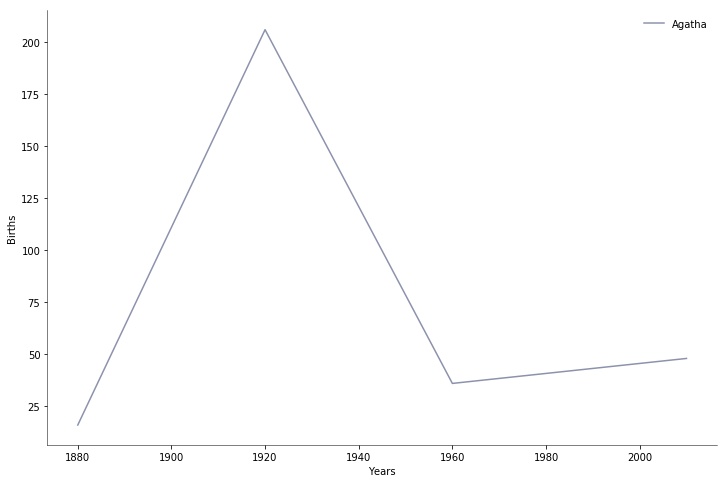

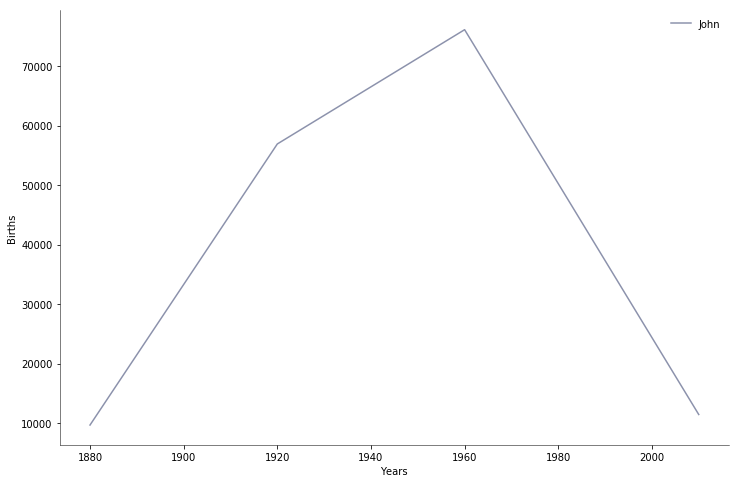

In [174]:
# Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние
# на динамику имен, постройте наглядную визуализацию
celebrities = {'Elvis': 'M', 'Michael': 'M', 'Agatha': 'F', 'John': 'M'}
dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframes.append(dataframe.assign(year=year))

result = pd.concat(dataframes)

for celebrity, sex in celebrities.items():
    names = result[result.name == celebrity]
    dataframe = names[names.sex == sex]
    fig, ax = plt.subplots(1, 1, figsize=(12,8))

    ax.set_xlabel('Years', fontsize = 10)
    ax.set_ylabel('Births', fontsize = 10)
    ax.plot(dataframe['year'], dataframe['count'], label=celebrity, color='#8c92ac', ls='-')
    ax.legend(loc=1, fontsize=10, frameon=False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)

